In [47]:
import librosa

In [48]:
samples, sr = librosa.load(r'C:\Users\NUhunsere\fine_tuning_project\My_Data\Audio\0\0_george_11.wav')

In [49]:
print(len(samples))
print(sr)

10091
22050


In [50]:
import librosa.display
import matplotlib.pyplot as plt

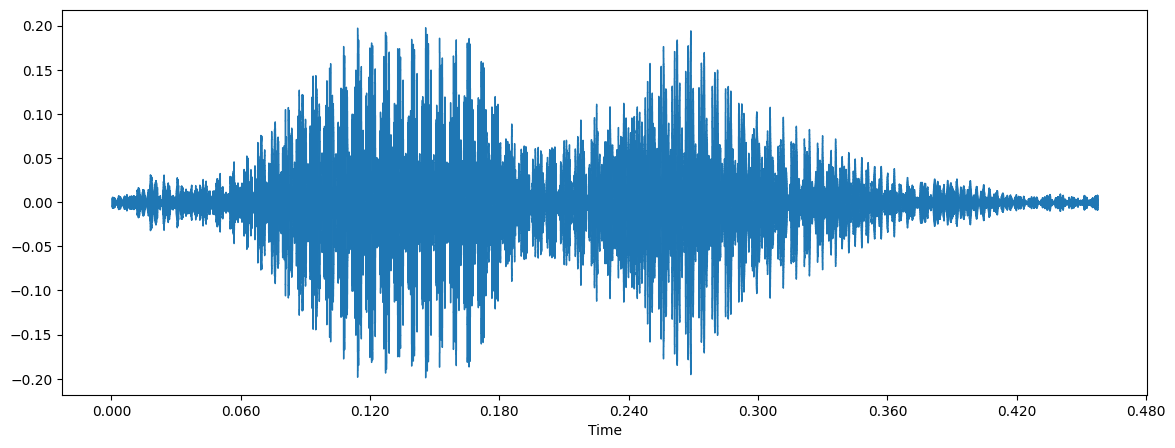

In [51]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(samples, sr=sr)

In [52]:
from IPython.display import Audio
Audio(r'C:\Users\NUhunsere\fine_tuning_project\My_Data\Audio\0\0_george_11.wav')

[[ 5.8708079e-02+0.0000000e+00j  9.0309782e-03+0.0000000e+00j
  -2.5621004e-02+0.0000000e+00j ... -2.5850179e-02+0.0000000e+00j
  -2.6838683e-02+0.0000000e+00j -3.6187068e-02+0.0000000e+00j]
 [-6.5605737e-02-1.3610204e-02j  1.6259484e-02-3.5232820e-02j
   1.3374619e-02+1.3305749e-05j ...  1.3015417e-02-1.9209119e-04j
   1.2258691e-02-1.8179043e-04j  1.7600883e-02-9.3508335e-03j]
 [ 7.2679982e-02+1.5988842e-02j -3.5641514e-02-6.8509569e-03j
   1.7077141e-04-6.0974569e-05j ...  3.7134613e-04-1.6363087e-04j
  -1.1625605e-03-6.9059792e-04j  7.3764664e-03+1.0025334e-02j]
 ...
 [ 1.0021143e-03-6.1088081e-06j -4.9952761e-04+3.0591218e-06j
  -3.2663262e-08+9.5625694e-09j ... -6.0153358e-09+1.6451528e-09j
  -2.2150575e-06+2.8079319e-06j  3.1861859e-05-4.0351541e-05j]
 [-1.0021137e-03+3.0551262e-06j  1.5287380e-06+4.9952808e-04j
  -2.6881136e-08-9.7955493e-09j ... -9.1326537e-09-1.1180664e-09j
  -3.2348235e-06+1.5654716e-06j  2.2417704e-05+4.6272391e-05j]
 [ 1.0021147e-03+0.0000000e+00j  4.99534

C:\Users\NUhunsere\AppData\Local\Temp\ipykernel_3256\3294817832.py:3: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(sgram)


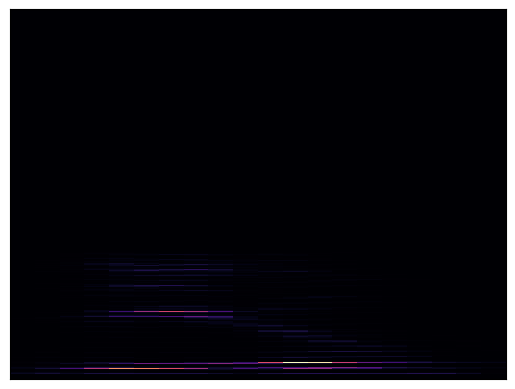

In [53]:
sgram = librosa.stft(samples)
print(sgram)
librosa.display.specshow(sgram)

C:\Users\NUhunsere\AppData\Local\Temp\ipykernel_3256\5434353.py:2: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(mel_scale)


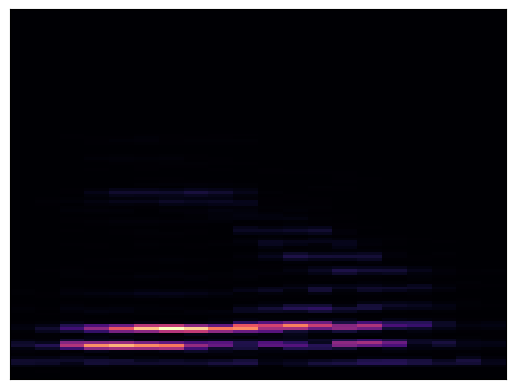

In [54]:
    mel_scale= librosa.feature.melspectrogram(S=sgram)
librosa.display.specshow(mel_scale)

C:\Users\NUhunsere\AppData\Local\Temp\ipykernel_3256\322637284.py:2: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  mel = librosa.amplitude_to_db(mel_scale, ref=np.min)


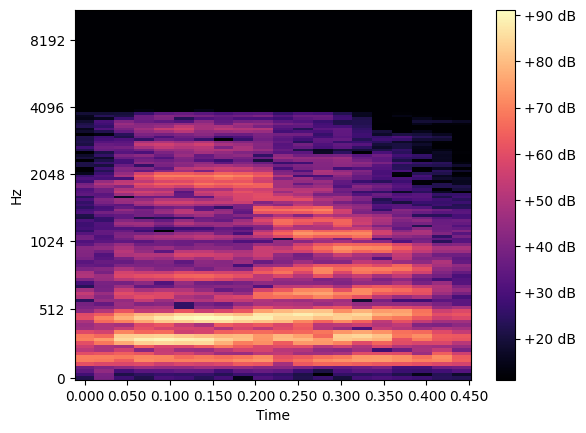

In [55]:
import numpy as np
mel = librosa.amplitude_to_db(mel_scale, ref=np.min)
librosa.display.specshow(mel, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')

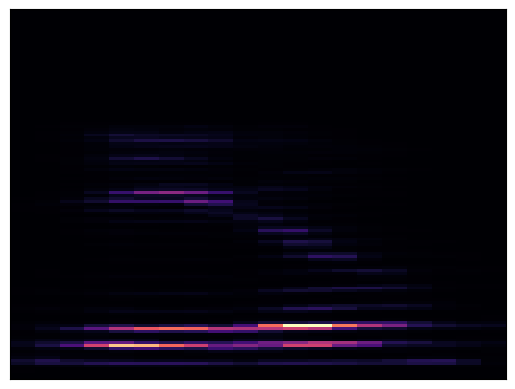

In [56]:
sgram_mag, _ = librosa.magphase(sgram)
mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sr)
librosa.display.specshow(mel_scale_sgram)

In [57]:
import numpy as np

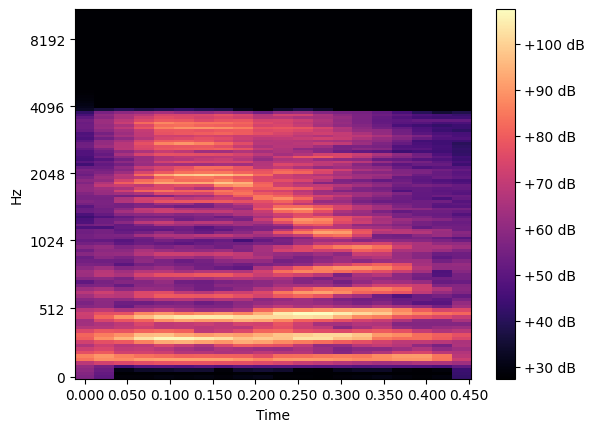

In [58]:
mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
librosa.display.specshow(mel_sgram, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')

In [59]:
plt.savefig('mel_spectrogram.png', dpi=300, bbox_inches='tight')


<Figure size 640x480 with 0 Axes>

In [60]:
y, sr = librosa. load(r'C:\Users\NUhunsere\fine_tuning_project\My_Data\Audio\0\0_george_11.wav', sr = 160000)
S = librosa.feature.melspectrogram (y=y, sr= sr,n_mels = 128)    
log_S = librosa.power_to_db(S, ref=np.max)

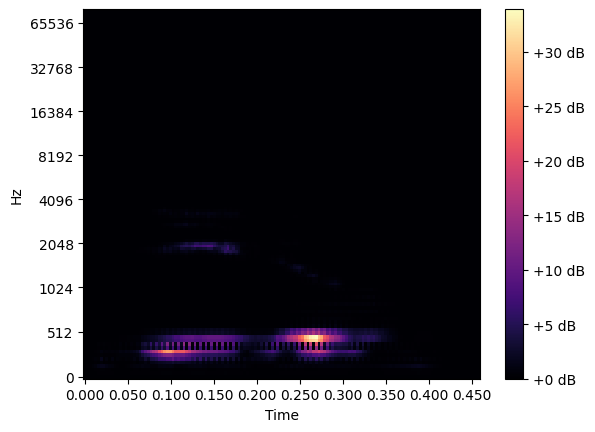

In [61]:
librosa.display.specshow(S, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')

In [62]:
img = ((log_S - log_S.min()) / (log_S.max() - log_S.min()) * 255).astype(np.uint8)


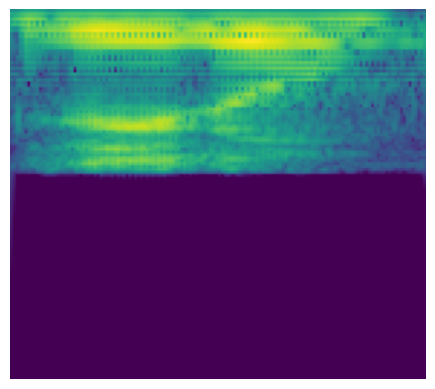

In [63]:
import matplotlib.pyplot as plt

plt.imshow(img)  # Use 'gray' colormap for grayscale images
plt.axis('off')  # Hide axes
plt.show()

In [64]:
import os 
from tqdm import tqdm
import imageio

In [65]:
##1 : Looping Over the subdirectories:
for num in range (10): 
    src_subdir = os.path.join (r'C:\Users\NUhunsere\fine_tuning_project\My_Data\Audio', str(num))  ### constructing a  path
    dest_subdir = os.path.join(r'C:\Users\NUhunsere\fine_tuning_project\My_Data\Mel_Specs_Mag\0', str(num))  ### constructing a path

    ### target_ sub_dir: 
    Mel_Specs = os.makedirs(dest_subdir, exist_ok = True)

    files = os.listdir(src_subdir)
    for file_name in tqdm(files, desc = f'Processing in Directory {num}'):
        src_file_path = os.path.join(src_subdir, file_name)
        target_file_path = os.path.join(dest_subdir, file_name.replace(".wav", ".png"))

        ### Converting the Audio to Mel Spectrograms:
        y, sr = librosa. load(src_file_path, sr = 160000)
        D = librosa.stft(y)  # Compute STFT
        S = librosa.feature.melspectrogram(S=np.abs(D)**2, sr=sr, n_mels=128)
        log_S = librosa.power_to_db(S, ref=np.max)
        
        img = ((log_S - log_S.min()) / (log_S.max() - log_S.min()) * 255).astype(np.uint8)
        imageio.imwrite(target_file_path, img)

Processing in Directory 2:   6%|▌         | 17/300 [00:00<00:03, 91.11it/s]


KeyboardInterrupt: 

In [ ]:
import os
import numpy as np
import librosa
from tqdm import tqdm
import imageio
from PIL import Image

def create_pink_colormap(n_bins=256):
    # Create a pink colormap
    start = np.array([255, 255, 255])  # White
    end = np.array([255, 20, 147])    # Deep Pink
    return np.linspace(start, end, n_bins).astype(np.uint8)

# Create the pink colormap
pink_colormap = create_pink_colormap()

for num in range(10):
    src_subdir = os.path.join(r'C:\Users\NUhunsere\fine_tuning_project\My_Data\Audio', str(num))
    dest_subdir = os.path.join(r'C:\Users\NUhunsere\fine_tuning_project\My_Data\Mel_Specs_Mag_1', str(num))

    os.makedirs(dest_subdir, exist_ok=True)

    files = os.listdir(src_subdir)
    for file_name in tqdm(files, desc=f'Processing in Directory {num}'):
        src_file_path = os.path.join(src_subdir, file_name)
        target_file_path = os.path.join(dest_subdir, file_name.replace(".wav", ".png"))

        # Converting the Audio to Mel Spectrograms:
        y, sr = librosa.load(src_file_path, sr=160000)
        D = librosa.stft(y)  # Compute STFT
        S = librosa.feature.melspectrogram(S=np.abs(D)**2, sr=sr, n_mels=128)
        log_S = librosa.power_to_db(S, ref=np.max)
        
        # Normalize the spectrogram
        norm_S = (log_S - log_S.min()) / (log_S.max() - log_S.min())
        
        # Apply the pink colormap
        colored_S = pink_colormap[np.uint8(norm_S * 255)]
        
        # Convert to PIL Image and save
        img = Image.fromarray(colored_S)
        img.save(target_file_path)

print("Processing complete!")

Processing in Directory 9: 100%|██████████| 300/300 [00:04<00:00, 73.66it/s]

Processing complete!


In [66]:
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from tqdm import tqdm

for num in range(10):
    src_subdir = os.path.join(r'C:\Users\NUhunsere\fine_tuning_project\My_Data\Audio', str(num))
    dest_subdir = os.path.join(r'C:\Users\NUhunsere\fine_tuning_project\My_Data\Mel_Specs_Mag_2' , str(num))

    os.makedirs(dest_subdir, exist_ok=True)

    files = os.listdir(src_subdir)
    for file_name in tqdm(files, desc=f'Processing in Directory {num}'):
        src_file_path = os.path.join(src_subdir, file_name)
        target_file_path = os.path.join(dest_subdir, file_name.replace(".wav", ".png"))

        # Converting the Audio to Mel Spectrograms:
        samples, sr = librosa.load(src_file_path, sr=160000)
        sgram = librosa.stft(samples)
        sgram_mag, _ = librosa.magphase(sgram)
        mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sr, n_mels=128)
        mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.max)

        # Plot and save the mel spectrogram
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(mel_sgram, sr=sr, x_axis='time', y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.title('Mel Spectrogram')
        plt.tight_layout()
        plt.savefig(target_file_path)
        plt.close()

print("Processing complete!")

Processing in Directory 0:   0%|          | 0/300 [00:00<?, ?it/s]Exception ignored in: <function PluginV3.__del__ at 0x00000203B1DE6340>
Traceback (most recent call last):
  File "c:\Users\NUhunsere\miniconda3\envs\audio-env\Lib\site-packages\imageio\core\v3_plugin_api.py", line 370, in __del__
    self.close()
  File "c:\Users\NUhunsere\miniconda3\envs\audio-env\Lib\site-packages\imageio\plugins\pillow.py", line 144, in close
    self._flush_writer()
  File "c:\Users\NUhunsere\miniconda3\envs\audio-env\Lib\site-packages\imageio\plugins\pillow.py", line 476, in _flush_writer
    if len(self.images_to_write) == 0:
           ^^^^^^^^^^^^^^^^^^^^
AttributeError: 'PillowPlugin' object has no attribute 'images_to_write'
Processing in Directory 9: 100%|██████████| 300/300 [02:13<00:00,  2.25it/s]

Processing complete!
